In [1]:
from sympy import *

In [2]:
def Dnb(T,C,m,A,K,f1,f2,fn,zeta):
    def M0(A,K,f1,f2,fn,zeta):
        def intF(f,fn,zeta):
            return (2*fn*sqrt(1 - zeta**2)*(atan((f - fn*sqrt(1 - zeta**2))/sqrt(fn**2*zeta**2)) + atan((f + fn*sqrt(1 - zeta**2))/sqrt(fn**2*zeta**2))) + sqrt(fn**2*zeta**2)*(-log(f**2 - 2*f*fn*sqrt(1 - zeta**2) + fn**2) + log(f**2 + 2*f*fn*sqrt(1 - zeta**2) + fn**2)))/(8*fn**3*sqrt(fn**2*zeta**2)*sqrt(1 - zeta**2));
        out = intF(f2,fn,zeta)
        out -= intF(f1,fn,zeta)
        out *= A*K**2
        out /= (2*pi)**4
        return out;
    def M2(A,K,f1,f2,fn,zeta):
        def intF(f,fn,zeta):
            return f*(3*f**4 + 20*f**2*fn**2*zeta**2 - 10*f**2*fn**2 - 5*f**2 - 15*f*fn*sqrt(1 - zeta**2) + 15*fn**4 - 15*fn**2)/15
        out = intF(f2,fn,zeta)
        out -= intF(f1,fn,zeta)
        out *= A*K**2
        out /= (2*pi)**4
        return out;
    m0=M0(A,K,f1,f2,fn,zeta);
    m2=M2(A,K,f1,f2,fn,zeta);
    E0p = sqrt(m2/m0)
    return (E0p*T/C)*((2*m0)**(m/2.0))\
    *gamma(m/2.0+1);

In [3]:
import numpy as np

In [10]:
fn = np.logspace(0,3,100)

In [11]:
D = np.zeros(len(fn))
D1 = np.zeros(len(fn))
D2  = np.zeros(len(fn))

In [12]:
for i in range(len(fn)):
    D[i] = Dnb(1,1,4,1,1,1,1000,fn[i],0.02)
    D1[i] = Dnb(1,1,4,1,1,1,500,fn[i],0.02)
    D2[i] = Dnb(1,1,4,1,1,500,1000,fn[i],0.02)
    

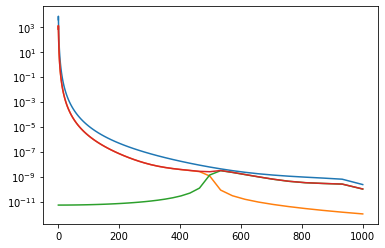

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fn,D);
plt.plot(fn,D1);
plt.plot(fn,D2);
plt.plot(fn,D1+D2);
plt.yscale('log');

In [14]:
def Ddirlik(T,C,m,A,K,f1,f2,fn,zeta):
    def M0(A,K,f1,f2,fn,zeta):
        def intF(f,fn,zeta):
            return (2*fn*sqrt(1 - zeta**2)*(atan((f - fn*sqrt(1 - zeta**2))/sqrt(fn**2*zeta**2)) + atan((f + fn*sqrt(1 - zeta**2))/sqrt(fn**2*zeta**2))) + sqrt(fn**2*zeta**2)*(-log(f**2 - 2*f*fn*sqrt(1 - zeta**2) + fn**2) + log(f**2 + 2*f*fn*sqrt(1 - zeta**2) + fn**2)))/(8*fn**3*sqrt(fn**2*zeta**2)*sqrt(1 - zeta**2));
        out = intF(f2,fn,zeta)
        out -= intF(f1,fn,zeta)
        out *= A*K**2
        out /= (2*pi)**4
        return out;
    def M1(A,K,f1,f2,fn,zeta):
        def intF(f,fn,zeta):
            return atan((f**2 + 2*fn**2*zeta**2 - fn**2)/sqrt(-4*fn**4*zeta**4 + 4*fn**4*zeta**2))/(2*sqrt(-4*fn**4*zeta**4 + 4*fn**4*zeta**2))
        out = intF(f2,fn,zeta)
        out -= intF(f1,fn,zeta)
        out *= A*K**2
        out /= (2*pi)**4
        return out;
    def M2(A,K,f1,f2,fn,zeta):
        def intF(f,fn,zeta):
            return f*(3*f**4 + 20*f**2*fn**2*zeta**2 - 10*f**2*fn**2 - 5*f**2 - 15*f*fn*sqrt(1 - zeta**2) + 15*fn**4 - 15*fn**2)/15
        out = intF(f2,fn,zeta)
        out -= intF(f1,fn,zeta)
        out *= A*K**2
        out /= (2*pi)**4
        return out;
    def M4(A,K,f1,f2,fn,zeta):
        def intF(f,fn,zeta):
            return (4*f*fn*sqrt(1 - zeta**2) - (-fn**2*(4*zeta**2 - 3)/2 - fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))*log(f - 2*fn*zeta**2*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) + fn*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) - 2*zeta**2*sqrt(1 - zeta**2)*(-fn**2*(4*zeta**2 - 3)/2 - fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))/(4*fn*zeta**4 - 5*fn*zeta**2 + fn)) + (-fn**2*(4*zeta**2 - 3)/2 - fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))*log(f + 2*fn*zeta**2*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) - fn*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) + 2*zeta**2*sqrt(1 - zeta**2)*(-fn**2*(4*zeta**2 - 3)/2 - fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))/(4*fn*zeta**4 - 5*fn*zeta**2 + fn)) - (-fn**2*(4*zeta**2 - 3)/2 + fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))*log(f - 2*fn*zeta**2*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) + fn*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) - 2*zeta**2*sqrt(1 - zeta**2)*(-fn**2*(4*zeta**2 - 3)/2 + fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))/(4*fn*zeta**4 - 5*fn*zeta**2 + fn)) + (-fn**2*(4*zeta**2 - 3)/2 + fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))*log(f + 2*fn*zeta**2*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) - fn*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) + 2*zeta**2*sqrt(1 - zeta**2)*(-fn**2*(4*zeta**2 - 3)/2 + fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))/(4*fn*zeta**4 - 5*fn*zeta**2 + fn)))/(4*fn*sqrt(1 - zeta**2))
        out = intF(f2,fn,zeta)
        out -= intF(f1,fn,zeta)
        out *= A*K**2
        out /= (2*pi)**4
        return out;
    m0=M0(A,K,f1,f2,fn,zeta);
    m1=M1(A,K,f1,f2,fn,zeta);
    m2=M2(A,K,f1,f2,fn,zeta);
    m4=M4(A,K,f1,f2,fn,zeta);
    r = m2/sqrt(m0*m4);
    Ep = sqrt(m4/m2);
    Xm = (m1/m0)*sqrt(m2/m4);
    D1 = 2*(Xm-r**2)/(1+r**2);
    R = (r - Xm - D1**2)\
       /(1 - r - D1 + D1**2);
    D2 = (1 - r - D1 + D1**2)\
         /(1-R);
    D3 = 1- D1 - D2;
    Q = 1.25*(r - D3 - D2*R)/D1;
    sa, Z = symbols('sa Z');
    fsa = (D1/Q)*exp(-Z/Q);
    fsa += (D2*Z/(R**2))*exp((-Z**2)/(2*R**2));
    fsa += D3*Z*exp((-Z**2)/2)
    fsa /= sqrt(m0);
    fsa *= sa**m;
    fsa.subs(Z,sa/sqrt(m0));
    out = integrate(fsa,(sa,0,oo));
    out *= Ep*T;
    out /= C;
    
    
    return out

In [15]:
for i in range(len(fn)):
    D[i] = Ddirlik(1,1,4,1,1,1,1000,fn[i],0.02)
    D1[i] = Ddirlik(1,1,4,1,1,1,500,fn[i],0.02)
    D2[i] = Ddirlik(1,1,4,1,1,500,1000,fn[i],0.02)


KeyboardInterrupt: 

In [ ]:
plt.plot(fn,(D1+D2)/D);